In [1]:
import os
import sys
import numpy as np
import pickle ##look for this
import matplotlib.pyplot as plt
import flopy

flopy is installed in C:\ProgramData\Anaconda3\lib\site-packages\flopy


In [61]:
#dis file 
nlay = 1
nrow = 1
ncol = 26
xext = 0.026
yext = 1

delr = xext/ncol
delc = yext/nrow

top = 0.0385
bot = 0

#time discretisation (first is steady state, the rest is transient)
nper = 1
perlen = 60*np.ones(1, dtype = np.float32)
# perlen[0] = 0
nstp = 60*np.ones(1, dtype = np.int32) #n steps in each time
# nstp[0] = 1
steady = np.ones(1, dtype = np.bool) #define each time as steady state or transient
# steady[0] = 1

mf = flopy.modflow.Modflow('E42018b-m001', namefile_ext = 'nam', exe_name='mf2005.exe')

In [62]:
#create disfile
dis = flopy.modflow.ModflowDis(mf, nlay = nlay, nrow= nrow, ncol = ncol, delr = delr, delc = delc,
                               top = top, botm = bot, nper = nper, perlen = perlen, nstp = nstp, steady = steady)

#create bas file
ibound = 1
strt = 0.0385
bas = flopy.modflow.ModflowBas(mf, ibound = ibound, strt = strt)

# Create layer-properties file LPF

hk = 1e-10
vka = 1.0
sy = 0.25
ss = 3.5E-06
laytyp = 0
lpf = flopy.modflow.ModflowLpf(mf, hk = hk, vka = vka, sy = sy, ss = ss, laytyp = laytyp, ipakcb = 53)

# Create output control file
ocdata = {}
for kper in range(nper):
    for kstp in range(nstp[kper]):
        ocdata[(kper, kstp)] = ['save head', 'save drawdown', 'save budget']
oc = flopy.modflow.ModflowOc(mf, stress_period_data = ocdata, compact = True)

# #well data
# welldata = pickle.load(open('lists/wel.pkl', 'rb'))
# wel = flopy.modflow.ModflowWel(mf, stress_period_data = welldata, ipakcb = 53)

# #recharge data
# rch = np.loadtxt('arrays/rch-initial.txt')
# rch = flopy.modflow.ModflowRch(mf, rech = rch, ipakcb = 53)

# #et data
# exdp = 3
# refet = np.loadtxt('arrays/refET.txt')
# evt = flopy.modflow.ModflowEvt(mf, surf = top, evtr = refet, exdp = exdp, ipakcb = 53)

# PCG solver file
pcg = flopy.modflow.ModflowPcg(mf, hclose = 1.0E-03, rclose = 1.0E-02)

# # input observations
# obsdat = np.loadtxt('lists/head-obs.txt')
# type(obsdat[:,4])
# time_series_data = np.column_stack((obsdat[:,0], obsdat[:,4]))
# obs01 = flopy.modflow.HeadObservation(mf, layer = 0, row = 56, column = 164,
#                                              obsname = 'obs01', irefsp = 2, time_series_data = time_series_data)
# hob = flopy.modflow.ModflowHob(mf, iuhobsv = 61, hobdry = -8888.88, obs_data = obs01)

mf.write_input()

success, mfoutput = mf.run_model(silent = False, pause = False, report = True)

FloPy is using the following  executable to run the model: C:\Windows\mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.9.01 5/01/2012                        

 Using NAME file: E42018b-m001.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/12/09 10:36:49

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Grou

In [63]:
# Extract heads
headobj = flopy.utils.binaryfile.HeadFile('E42018b-m001.hds')
times = headobj.get_times()

[[[0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385
   0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385 0.0385
   0.0385 0.0385 0.0385 0.0385 0.0385 0.0385]]]


C:\ProgramData\Anaconda3\lib\site-packages\flopy\plot\crosssection.py:764: PendingDeprecationWarning: ModelCrossSection will be replaced by PlotCrossSection(), Calling PlotCrossSection()
  warnings.warn(err_msg, PendingDeprecationWarning)


<Figure size 432x288 with 0 Axes>

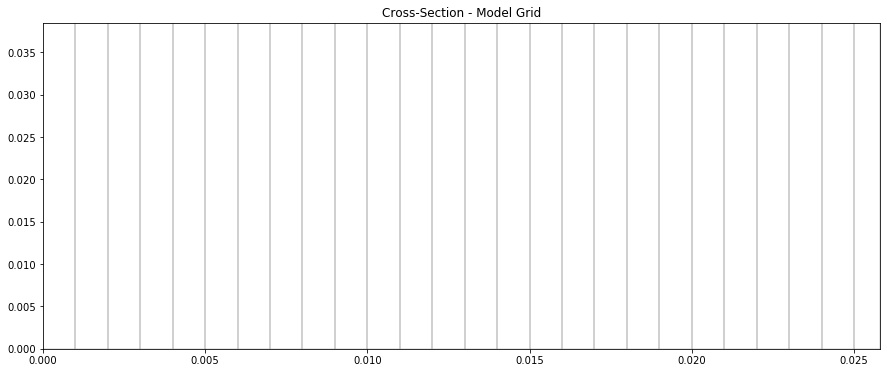

In [64]:
# Plot heads
f = plt.figure()
plotper = [(0,0), (1,0), (30,0), (59,0)]
print(headobj.get_data(kstpkper = (1,0)))
# for iper in range(4):
#     heads = headobj.get_data(kstpkper = plotper[iper])
#     hmin = heads.min
#     hmax = heads.max
#     print(type(hmin))
# #     levels= np.linspace(hmin, hmax, 13)
#     plt.subplot(2, 2, iper + 1)
#     modelmap = flopy.plot.ModelMap(model = mf)
#     hm = modelmap.plot_array(heads)
# #     cm = modelmap.contour_array(heads, colors = 'k')
#     plt.title('E42018b-m001 heads')

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
# Next we create an instance of the ModelCrossSection class
# modelxsect = flopy.plot.ModelCrossSection(model=mf, line={'Column': 5})
modelxsect = flopy.plot.ModelCrossSection(model=mf, line={'Row': 0})

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
linecollection = modelxsect.plot_grid(linewidth=0.4)
t = ax.set_title('Cross-Section - Model Grid')